# 1 Описание задачи для дипломного проекта

Как и любой бизнес, компания «Мегафон» хочет повысить удовлетворённость своих клиентов качеством услуг. Это важная задача для удержания пользователей — как давних, так и недавно привлечённых. Ведь затраты на маркетинг и продвижение не оправдаются, если клиент уйдёт из-за низкого качества связи. Однако в реальном мире ресурсы всегда ограничены, и в единицу времени технический отдел может решить конечное количество задач. <br>

Чтобы делать это наиболее эффективно, важно определить, какие технические показатели качества связи сильнее всего влияют на удовлетворённость клиентов, и в первую очередь направить ресурсы на работу с ними. Для этого «Мегафон» провёл опрос своих клиентов, предложив им оценить уровень удовлетворённости качеством связи. По каждому клиенту, прошедшему опрос, были собраны технические показатели. <br>

Подготовьте исследование для компании «Мегафон» и проанализируйте, как зависит (и зависит ли) оценка, которую ставит клиент в опросе, от технических показателей, которые были собраны. <br><br><br>

**Более подробно о проведённом опросе:**

В ходе опроса компания «Мегафон» предложила своим клиентам оценить уровень удовлетворённости качеством связи по десятибалльной шкале (где 10 — это «отлично», а 1 — «ужасно»). Если клиент оценивал качество связи на 9 или 10 баллов, опрос заканчивался. Если клиент ставил оценку ниже 9, задавался второй вопрос — о причинах неудовлетворённости качеством связи с предоставленными пронумерованными вариантами ответа. Ответ можно было дать в свободном формате или перечислить номера ответов через запятую. Ниже вы можете ознакомиться с инфографикой по структуре опроса.<br>

*Обратите, пожалуйста, внимание, что для работы вам даны реальные данные, что может повлечь необходимость в дополнительной их обработке.*

![](https://sun9-32.userapi.com/C6vN5pHQW7hlseIt0AtTN7qNDQbDnHXdt1P2NA/ILntXqa-RrA.jpg)

# 2 Подготовка данных

Загружаем необходимые библиотеки и данные.

In [ ]:
#Загружаем библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import random

from scipy import stats

import warnings

In [ ]:
#Загружаем датасет
df_main = pd.read_csv('megafon.csv')
df_main.head()

,user_id,Q1,Q2,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms)
0,1,5,NaN,775.48846,360.13,86.56,3.93,1859.15,2309,1007.82,83
1,2,5,4,861.96324,3023.54,411.18,1.27,667.47,2080,255.36,425
2,3,1,4,261.11860,790.96,34.20,1.79,1079.60,6367,535.85,485
3,4,8,3,179.18564,2590.97,325.88,0.80,7053.81,3218,1221.02,51
4,5,2,"2, 3, 4",351.99208,731.61,223.54,1.15,4550.38,1767,2336.56,68



`megafon.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `user_id` — идентификатор абонента;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Q1` — ответ на первый вопрос;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Q2` — ответ на второй вопрос;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Total Traffic(MB)` — объем трафика передачи данных <sup>1 </sup>; <br>
&nbsp;&nbsp;&nbsp;&nbsp; `Downlink Throughput(Kbps)` — средняя скорость «к абоненту» <sup>2 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Uplink Throughput(Kbps)`— средняя скорость «от абонента» <sup>3 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Downlink TCP Retransmission Rate(%)` — частота переотправок пакетов «к абоненту» <sup>4 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Video Streaming Download Throughput(Kbps)` — скорость загрузки потокового видео <sup>5 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Video Streaming xKB Start Delay(ms)` — задержка старта воспроизведения видео <sup>6 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Web Page Download Throughput(Kbps)` — скорость загрузки web-страниц через браузер <sup>7 </sup>;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Web Average TCP RTT(ms)` — пинг при просмотре web-страниц<sup>8 </sup>.<br>


<sup>1 </sup> — Насколько активно абонент использует мобильный интернет.<br>
<sup>2 </sup> — Считается по всему трафику передачи данных.<br>
<sup>3 </sup> — Считается по всему трафику передачи данных.<br>
<sup>4 </sup> — Чем выше, тем хуже. Если в канале возникает ошибка, пакет переотправляется. Снижается полезная скорость.<br>
<sup>5 </sup> — Чем выше, тем лучше — меньше прерываний и лучше качество картинки.<br>
<sup>6 </sup> — Сколько времени пройдёт между нажатием на кнопку Play и началом воспроизведения видео. Чем меньше это время, тем быстрее начинается воспроизведение.<br>
<sup>7 </sup> — Чем выше, тем лучше.<br>
<sup>8 </sup> — Чем меньше, тем лучше — быстрее загружаются web-страницы.<br>

Первый технический показатель представлен как сумма за период в одну неделю перед участием в опросе. Остальные технические показатели отображают среднее значение по данному признаку за период в одну неделю перед участием в опросе.

#3 Предобработка данных

In [ ]:
#Смотрим обписание признаков
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3112 entries, 0 to 3111
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   user_id                                    3112 non-null   int64  
 1   Q1                                         3110 non-null   object 
 2   Q2                                         1315 non-null   object 
 3   Total Traffic(MB)                          3112 non-null   float64
 4   Downlink Throughput(Kbps)                  3112 non-null   float64
 5   Uplink Throughput(Kbps)                    3112 non-null   float64
 6   Downlink TCP Retransmission Rate(%)        3112 non-null   float64
 7   Video Streaming Download Throughput(Kbps)  3112 non-null   float64
 8   Video Streaming xKB Start Delay(ms)        3112 non-null   int64  
 9   Web Page Download Throughput(Kbps)         3112 non-null   float64
 10  Web Average TCP RTT(ms) 

In [ ]:
#Смотрим наличие пропущенных значений
df_main.isnull().sum()

user_id                                         0
Q1                                              2
Q2                                           1797
Total Traffic(MB)                               0
Downlink Throughput(Kbps)                       0
Uplink Throughput(Kbps)                         0
Downlink TCP Retransmission Rate(%)             0
Video Streaming Download Throughput(Kbps)       0
Video Streaming xKB Start Delay(ms)             0
Web Page Download Throughput(Kbps)              0
Web Average TCP RTT(ms)                         0
dtype: int64

Видно, что имеются пропущенные 2 значения по первому вопросу и 1797 пропущенных значений по второму вопросу.<br> 
Если на первый вопрос отвечали 9-10, то ответ на второй вопрос будет отсутствовать.

## 3.1 Признак Q1

Разберёмся с первым вопросом. <br>
Признак Q1 должен быть целочисленным типом (int64), без пропущенных значений.

In [ ]:
#Посмотрим уникальные значения Q1
pd.unique(df_main.Q1)

array(['5', '1', '8', '2', '3', '9', '10', '7', '4', '11', '6', '2, 9',
       '0', '1, 3', '19', '15', nan, '1, 6', '***** ** ***',
       '3 - дер.Ширяево Волоколамского района, 9 - в Москве', '10, 9',
       'Чем даль ше,тем лучше.Спасибо за ваш труд.Оценка 10 !',
       'ОЦЕНКА-3/НЕВАЖНО/', 'Отвратительно',
       'Я ценой услуг не удовлетворен', 'Пока не понял', '3, 9', '5, 6',
       '0, 1, 5', '5, 7', 'Hi',
       '4. Тульская область Заокский район. Романовские дачи связи почти нет',
       'Немагу дать атценку денги незашто снимаеть скоро выклучаю',
       '10, 50',
       'Очень  хорошо. Обслуживания  я довольно. Спасибо вам.555', '?',
       'Поохое',
       'Когда в Москве-10 а когда в калужской области в деревне Бели-1',
       'Нет', 'Да', 'Ужасно',
       '3 тройка, связь отвратительная, жалко платить за такой тарив',
       'Чдтчдтччдтччч', '3, 7', '20, 89031081392', '1, 8', 'Без з',
       '10, 5', '2, 5',
       'Я в Смол. Области живу сейчас, не пользуюсь телефоном с

In [ ]:
#Посмотрим ответы на вопрос которые не подходят по формату в самом датасете

index_num = []

for i in range(df_main.shape[0]):
  if pd.to_numeric(df_main.iloc[i, 1], errors='coerce') not in list(range(1, 11)):
    index_num.append(i)

df_main.loc[index_num]

,user_id,Q1,Q2,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms)
31,32,11,NaN,375.23606,5980.48,119.63,0.48,8723.10,1030,6645.56,59
80,81,"2, 9",NaN,567.03467,1049.72,149.62,1.29,1925.91,1263,761.13,475
117,118,0,NaN,837.55274,2511.24,113.10,0.39,4976.77,2244,1544.19,66
158,159,0,NaN,126.51761,361.56,46.89,0.82,965.21,3564,1709.08,90
238,239,"1, 3",NaN,347.03333,2177.92,152.08,2.23,5305.51,1039,2978.12,75
245,246,19,NaN,443.12523,4053.99,320.17,1.44,14922.21,941,3082.47,143
351,352,15,NaN,884.74983,714.05,74.00,0.26,2888.80,2657,2200.98,314
371,372,NaN,NaN,286.62191,2320.25,75.60,3.84,4499.92,1790,1035.64,200
459,460,"1, 6",NaN,190.05419,13188.11,117.64,0.83,11146.57,746,1636.00,88
479,480,0,NaN,298.27345,301.39,80.51,1.22,7273.17,2128,1805.21,133


Из условия работы ясно что, все значения не подходящие под нужный формат не имеют вариантов ответа на второй вопрос.

Пропишем условия форматирования для имеющихся неформатных ответов.

Если в ответе присутствуют числа и одно из чисел больше 9 (а также ответ "Да" и пропущенные значения NaN), то значение в признаке Q1 меняется на 10 (так как отсутствуют более конкретные данные, то предположим, что этот клиент доволен качеством обслуживания и просто опечатался при ответе).

Если в ответе присутствуют числа и одно из чисел меньше 9 (а также ответ "Нет" и ответы без чисел), то значение в признаке Q1 меняется на 1 (и в ответе на второй вопрос о причинах ставим значение 6 - "Затрудняюсь ответить")

In [ ]:
#Заполним два пропущенных значения
df_main.Q1 = df_main.Q1.fillna(10)

In [ ]:
#Заменим значения в соответствии с условиями выше при помощи регулярных выражений

for i in range(df_main.shape[0]):

    if pd.to_numeric(df_main.iloc[i, 1], errors='coerce') not in list(range(1, 11)):

      #Находим ответы с числами, ответы "Да" и ответы "Нет"
      nums = re.findall('\d+', df_main.iloc[i, 1])
      yes_n = re.findall('Да', df_main.iloc[i, 1])
      no_n = re.findall('Нет', df_main.iloc[i, 1])

      int_nums = [int(item) for item in nums]

      if len(yes_n) != 0: #Если ответ был "Да"
        df_main.iloc[i, 1] = 10

      elif len(no_n) != 0: #Если ответ был "Нет"
        df_main.iloc[i, 1] = 1
        df_main.iloc[i, 2] = '6'

      #Если ответ: числа и хотя бы одно больше или равно 9
      elif any(n >= 9 for n in int_nums): 
        df_main.iloc[i, 1] = 10
        
      #Если ответ: числа меньше 9
      elif all(n < 9 for n in int_nums): 
        df_main.iloc[i, 1] = 1
        df_main.iloc[i, 2] = '6'


In [ ]:
#Переведём столбец в числовой тип
df_main.Q1 = df_main.Q1.astype(int)

In [ ]:
#Проверим
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3112 entries, 0 to 3111
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   user_id                                    3112 non-null   int64  
 1   Q1                                         3112 non-null   int64  
 2   Q2                                         1352 non-null   object 
 3   Total Traffic(MB)                          3112 non-null   float64
 4   Downlink Throughput(Kbps)                  3112 non-null   float64
 5   Uplink Throughput(Kbps)                    3112 non-null   float64
 6   Downlink TCP Retransmission Rate(%)        3112 non-null   float64
 7   Video Streaming Download Throughput(Kbps)  3112 non-null   float64
 8   Video Streaming xKB Start Delay(ms)        3112 non-null   int64  
 9   Web Page Download Throughput(Kbps)         3112 non-null   float64
 10  Web Average TCP RTT(ms) 

Посмотрим на частотное распределение признака Q1

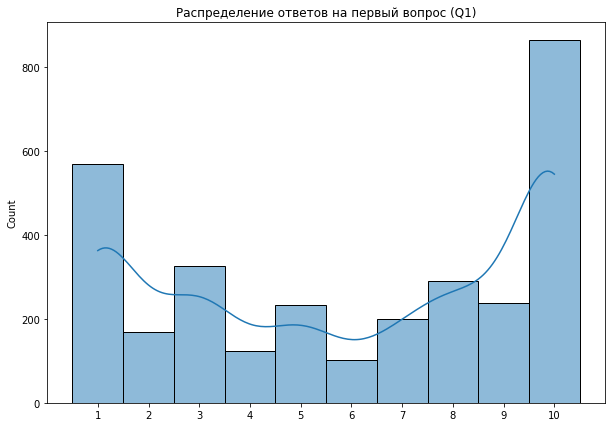

In [ ]:
plt.subplots(figsize=(10, 7))

g = sns.histplot(df_main.Q1, bins=10, kde=True, discrete=True)
g.set_xticks(range(1, 11))
g.set_title('Распределение ответов на первый вопрос (Q1)')
g.set(xlabel=None)

plt.show()

Из графика видно, что преобладают предельные значения (люди либо резко недовольны связью, либо наоборот).


Разделим датесет на более общие оценки. Для этого определим с какой оценки наступает положительная динамика в изменениях значений технических характеристик.

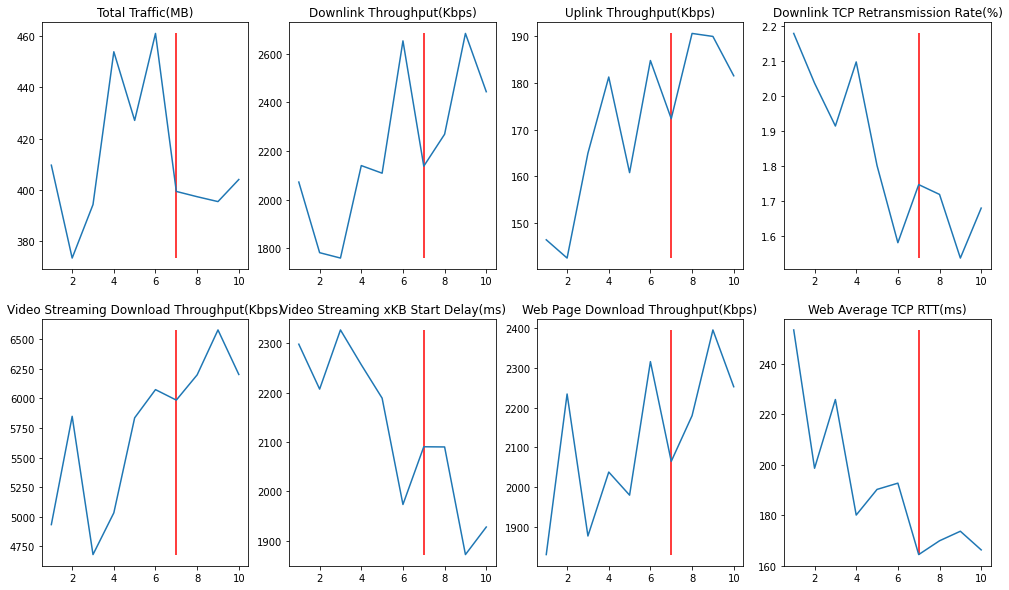

In [ ]:
columns_list = df_main.columns[3:]

fig, ax = plt.subplots(2, 4, figsize=(17, 10))

for i in range(4):
  for j in range(2):
    ax[j][i].plot(df_main.groupby('Q1').mean()[columns_list[i+4*j]])
    ax[j][i].vlines(7, ymin=min(df_main.groupby('Q1').mean()[columns_list[i+4*j]]), 
                    ymax=max(df_main.groupby('Q1').mean()[columns_list[i+4*j]]), color='red')
    ax[j][i].set_title(columns_list[i+4*j])

plt.show()

Виден рост значений, либо снижение темпа падения значений в технических характеристиках при оценке от 7 до 10.

Таким образом, делим первые оценки пользователей на четыре части:

1-2: Very Bad

3-6: Bad

7-8: Good

9-10: Very Good

In [ ]:
df_main['client_answer'] = None

In [ ]:
for i in range(df_main.shape[0]):
  if df_main.iloc[i, 1] in [1, 2]:
    df_main.iloc[i, 11] = 'Very Bad'
  elif df_main.iloc[i, 1] in [3, 4, 5, 6]:
    df_main.iloc[i, 11] = 'Bad'
  elif df_main.iloc[i, 1] in [7, 8]:
    df_main.iloc[i, 11] = 'Good'
  elif df_main.iloc[i, 1] in [9, 10]:
    df_main.iloc[i, 11] = 'Very Good'

Посмотрим на частотное распределение по новому признаку Answer 

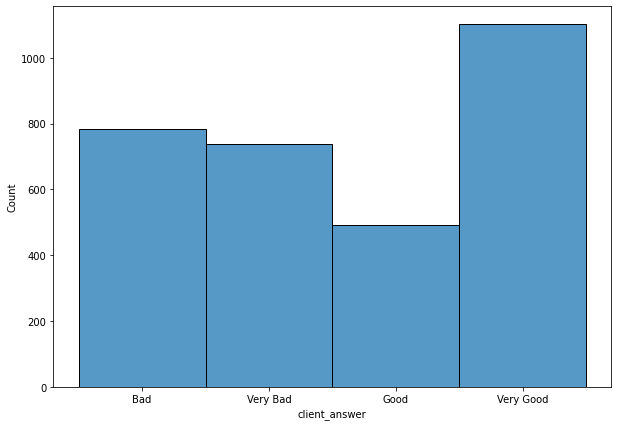

In [ ]:
plt.subplots(figsize=(10, 7))

sns.histplot(df_main.client_answer)

plt.show()

Распределение между отрицательными и положительными оценками примерно равно.

Оценки Bad и Very Bad находятся примерно на одном уровне.

Создадим датасет с хорошими (Good) и очень хорошими оценками (Very Good) по первому вопросу Q1.

In [ ]:
df_good = df_main[(df_main.client_answer == 'Very Good') | 
                  (df_main.client_answer == 'Good')]

df_good = df_good.drop(['Q1', 'Q2'], axis=1) #Удалим ненужные столбцы

Создадим датасет с плохими (Bad) и очень плохими оценками (Very Bad) по первому вопросу Q1.

In [ ]:
df_bad = df_main[(df_main.client_answer == 'Very Bad') | 
                 (df_main.client_answer == 'Bad')]

df_bad = df_bad.drop(['Q1', 'Q2'], axis=1) #Удалим ненужные столбцы

## 3.2 Признак Q2

Для ответов с высокими ответами на первый вопрос (при этом ответ на второй вопрос будет отсутствовать) зададим в признаке Q2 значение 0.

In [ ]:
for i in range(df_main.shape[0]):
  if df_main.iloc[i, 11] == 'Very Good':
    df_main.iloc[i, 2] = '0'

Удалим пропущенные значени, так как из них довольно сложно сделать какой-либо вывод.

In [ ]:
#Удалим пропущенные значения по признаку Q2
df_main.dropna(subset=['Q2'], inplace=True)

Так как в признаке Q2 имеются ответы соодержащие несколько значений, мной было принято решение добавить в датасет новые признаки с обозначением проблемы указанной абонентом. Если клиент указывает номер проблемы в ответе, то в соответствующей графе с этой проблемой появиться значение 1. Сделать так называемый One-Hot-Encoding.

Создадим следующие признаки:

&nbsp;&nbsp;&nbsp;&nbsp; `A1 (Answer 1)` — Недозвоны, обрывы при звонках;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `A2` — Время ожидания гудков при звонке;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `A3` — Плохое качество связи в зданиях, торговых центрах и т.п..<br>
&nbsp;&nbsp;&nbsp;&nbsp; `A4` — Медленный мобильный Интернет;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `A5` — Медленная загрузка видео;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `A6` — Затрудняюсь ответить;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `A7` — Свой вариант.<br>

In [ ]:
#Создадим колонки с нулевыми значениями

df_main['A1'] = 0
df_main['A2'] = 0
df_main['A3'] = 0
df_main['A4'] = 0
df_main['A5'] = 0
df_main['A6'] = 0
df_main['A7'] = 0

In [ ]:
for i in range(df_main.shape[0]):

    #Возьмем единичные ответы и пометим нужный признак (A1 - A7)
    if pd.to_numeric(df_main.iloc[i, 2], errors='coerce') in list(range(0, 8)):
      n = int(df_main.iloc[i, 2])
      if n != 0:
        df_main.iloc[i, 11+n] = 1


    #Возьмем списки с ответами
    elif pd.to_numeric(df_main.iloc[i, 2], errors='coerce') not in list(range(0, 8)):

      nums = re.findall('\d+', df_main.iloc[i, 2]) #Найдём цифры
      nums = [int(n) for n in nums] #Переведём в цифровой тип

      #Проверяем ответы каждого клиета и помечаем нужный признак (A1 - A7)
      for j in nums:
        if j in list(range(1, 8)):
          df_main.iloc[i, 11+j] = 1

In [ ]:
df_main.head()

,user_id,Q1,Q2,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms),client_answer,A1,A2,A3,A4,A5,A6,A7
1,2,5,4,861.96324,3023.54,411.18,1.27,667.47,2080,255.36,425,Bad,0,0,0,1,0,0,0
2,3,1,4,261.11860,790.96,34.20,1.79,1079.60,6367,535.85,485,Very Bad,0,0,0,1,0,0,0
3,4,8,3,179.18564,2590.97,325.88,0.80,7053.81,3218,1221.02,51,Good,0,0,1,0,0,0,0
4,5,2,"2, 3, 4",351.99208,731.61,223.54,1.15,4550.38,1767,2336.56,68,Very Bad,0,1,1,1,0,0,0
6,7,2,"4, 5",448.88413,438.27,81.32,1.98,1699.64,4223,856.05,220,Very Bad,0,0,0,1,1,0,0


## 3.3 Вывод по разделу

Теперь нет необходимости в признаке Q1 и Q2. Их можно удалить.

In [ ]:
df_main_total = df_main.drop(['Q1', 'Q2'], axis=1)

Так же уберём графы в которых не указана проблема (нет корректного ответа на Q2, либо ответ на Q1 от 9 до 10).

In [ ]:
df_main_total = df_main_total[(df_main_total.A1 == 1) |
                              (df_main_total.A2 == 1) |
                              (df_main_total.A3 == 1) |
                              (df_main_total.A4 == 1) |
                              (df_main_total.A5 == 1) |
                              (df_main_total.A6 == 1) |
                              (df_main_total.A7 == 1)]

Таким образом, мы подготовили три основных датасета для анализа и построения статистических гипотиз.

# 4 Основная часть исследования

## 4.1 Гипотеза №1

### Подготовка данных

In [ ]:
#Посмотрим на размеры выборок

df_good.shape, df_bad.shape

((1592, 10), (1520, 10))

Можно сказать, что выборки сбалансированы. Существует незначительная разница наблюдений.

In [ ]:
#Датасет с высокими оценками по Q1

df_good.head()

,user_id,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms),client_answer
3,4,179.18564,2590.97,325.88,0.80,7053.81,3218,1221.02,51,Good
7,8,550.44581,3428.69,164.44,1.05,16753.96,1061,3037.36,88,Very Good
13,14,228.44956,3004.18,138.20,5.26,9844.23,1280,1662.54,114,Very Good
14,15,485.87565,1700.86,155.76,1.01,2438.20,4512,2612.73,104,Good
15,16,767.54725,1729.37,107.94,1.96,2490.93,1660,2514.08,92,Very Good


In [ ]:
#Датасет с низкими оценками по Q1

df_bad.head()

,user_id,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms),client_answer
0,1,775.48846,360.13,86.56,3.93,1859.15,2309,1007.82,83,Bad
1,2,861.96324,3023.54,411.18,1.27,667.47,2080,255.36,425,Bad
2,3,261.11860,790.96,34.20,1.79,1079.60,6367,535.85,485,Very Bad
4,5,351.99208,731.61,223.54,1.15,4550.38,1767,2336.56,68,Very Bad
5,6,416.67461,1346.89,175.53,1.08,4553.01,2136,1587.58,551,Bad


&nbsp;&nbsp;&nbsp;&nbsp; `user_id` — идентификатор абонента;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Total Traffic(MB)` — объем трафика передачи данных; <br>
&nbsp;&nbsp;&nbsp;&nbsp; `Downlink Throughput(Kbps)` — средняя скорость «к абоненту»;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Uplink Throughput(Kbps)`— средняя скорость «от абонента»;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Downlink TCP Retransmission Rate(%)` — частота переотправок пакетов «к абоненту»;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Video Streaming Download Throughput(Kbps)` — скорость загрузки потокового видео;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Video Streaming xKB Start Delay(ms)` — задержка старта воспроизведения видео;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Web Page Download Throughput(Kbps)` — скорость загрузки web-страниц через браузер;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Web Average TCP RTT(ms)` — пинг при просмотре web-страниц.<br>

### 4.1.1 Формулировка гипотезы

Предположим, что все технические показатели влияют на качество оценки поставленной пользователем в первом вопросе Q1.<br>


---


**Нулевая гипотеза:**<br>
Технические показатели с высокой оценкой по Q1 не отличаются по качеству от технических показателей с более низкой оценкой по Q1.

**Альтернативная гипотеза:**<br>
Существует связь между техническими показателями и оценкой качества по вопросу Q1.<br>



---



Первая и самая очивидная гипотеза которую необходимо проверить. В случае, подтверждения нулевой гипотезы возникает вопрос о целесообразности проведения таких опросов. В случае, опровержения нулевой гипотезы можно будет определить проблемные места в технической части, которые напрямую влияют на отношение клиента к компании.


### 4.1.2 Разведочный анализ

Проведем разведочный анализ данных.

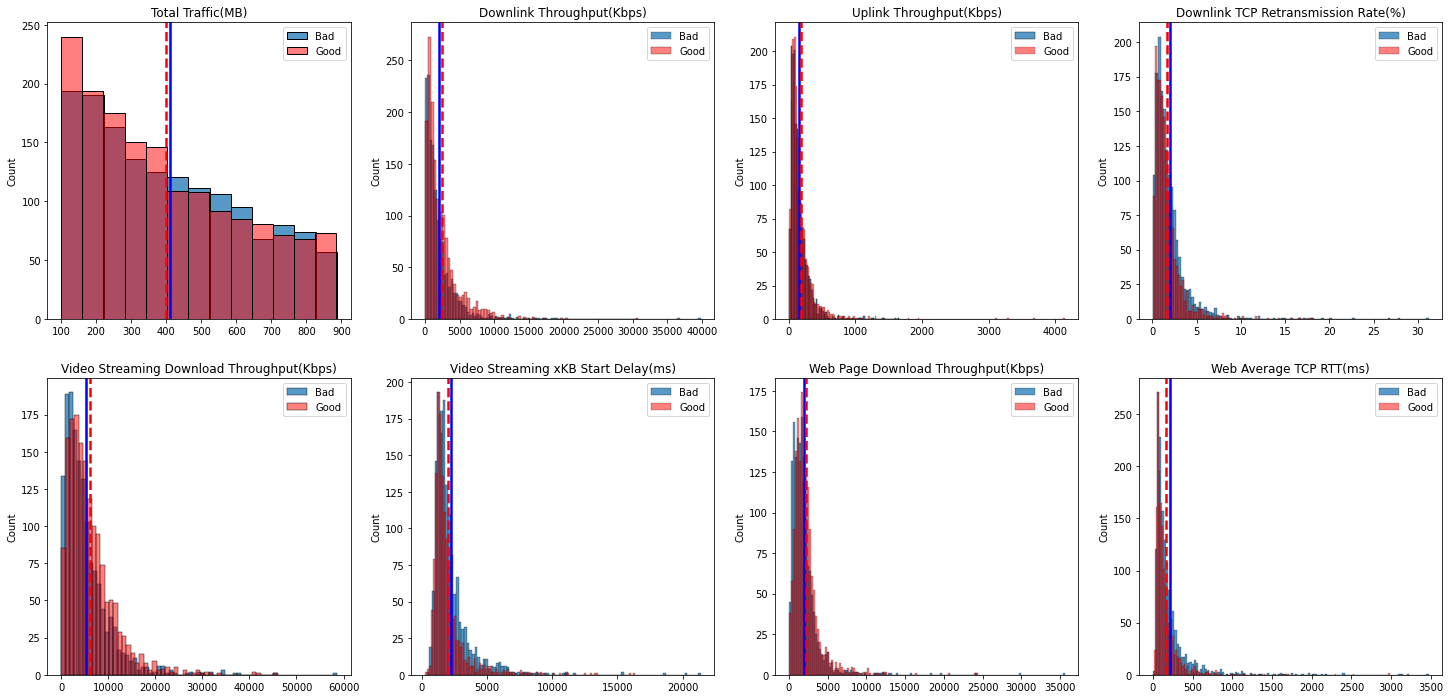

In [ ]:
# Посмотрим на распределение значений по всем техническим показателям
fig, axes = plt.subplots(2, 4, figsize=(25, 12))

for i in range(4):
  for j in range(2):
    sns.histplot(df_bad[columns_list[i+4*j]], ax=axes[j][i])
    sns.histplot(df_good[columns_list[i+4*j]], ax=axes[j][i], color='red', alpha=0.5)
    axes[j][i].legend(['Bad', 'Good'])

    axes[j][i].axvline(np.mean(df_bad[columns_list[i+4*j]]), c='blue', lw=2.5)
    axes[j][i].axvline(np.mean(df_good[columns_list[i+4*j]]), c='red', ls='--', lw=2.5)


    axes[j][i].set_title(columns_list[i+4*j])
    axes[j][i].set_xlabel(None)

В данных отсутствуют отрицательные значения.

По каждому техническому показателю наблюдается скошенность влево и длинный хвост вправо (выбросы), за исключение технического показателя Total Traffic (MB). 

На данном этапе уже можно сказать, что частотное распределение технических показателей с плохими оценками похоже с частотным распределением данных с хорошими оценками. Однако у их средних значений есть разница, поэтому необходим более детальный анализ.<br>

Распределение технических характеристик ненормальное, поэтому в дальнейшем будем делать бутстрэп и смотреть на пересечение доверительных интервалов.

### 4.1.3 Проверка статистической гипотезы

Проведем бутстрэп, построим доверительные интервалы и посмотрим на разницу средних значений.

In [ ]:
#функция для бутстрепинга

def bootstrap(df_A, df_B, N_count, inter):
  
  #Пустые массивы каждой группы из нулей
  A = np.zeros((1, N_count))
  B = np.zeros((1, N_count))
  differences = np.zeros((1, N_count))

  for i in range(0, N_count):
    s1 = random.choices(df_A.to_list(), k=df_A.shape[0]) #Создаем симуляцию A
    s2 = random.choices(df_B.to_list(), k=df_B.shape[0]) #Создаем симуляцию B

    A[0][i] = np.mean(s1) #Записываем средние значения A
    B[0][i] = np.mean(s2) #Записываем средние значения B

    #Разница средних
    differences[0][i] = np.mean(s2) - np.mean(s1)

  #Доверительный интервал
  interval = (100 - inter)/2

  #Построим графики
  fig, axes = plt.subplots(1, 2, figsize=(16, 7))
  fig.suptitle(df_A.name, y=0.95)

  #Воспроизводим на графике
  sns.distplot(A, label = 'Bad', ax=axes[0])
  sns.distplot(B, label = 'Good', ax=axes[0])
  axes[0].set_title('Доверительные интервалы')

  #Покажем процентиль 2.5% и 97.5%
  axes[0].axvline(np.percentile(A, interval),linestyle = '--',color='r')
  axes[0].axvline(np.percentile(A, 100-interval),linestyle = '--',color='g')

  axes[0].axvline(np.percentile(B, interval),linestyle = '-',color='r')
  axes[0].axvline(np.percentile(B, 100-interval),linestyle = '-',color='g')

  #Добавим легенду
  axes[0].legend(['Bad', 'Good'])

  #Распределение разницы средних значений
  sns.distplot(differences, ax=axes[1])
  axes[1].axvline(0, linestyle = '-',color='g')
  axes[1].axvline(np.percentile(differences, interval),linestyle = '--')
  axes[1].axvline(np.percentile(differences, 100-interval),linestyle = '--')
  axes[1].set_title('Разница средних')

  warnings.filterwarnings("ignore")

Зададим количество итераций бутстрепа 3000.<br>
Доверительный интервал принимаем равным 95%.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

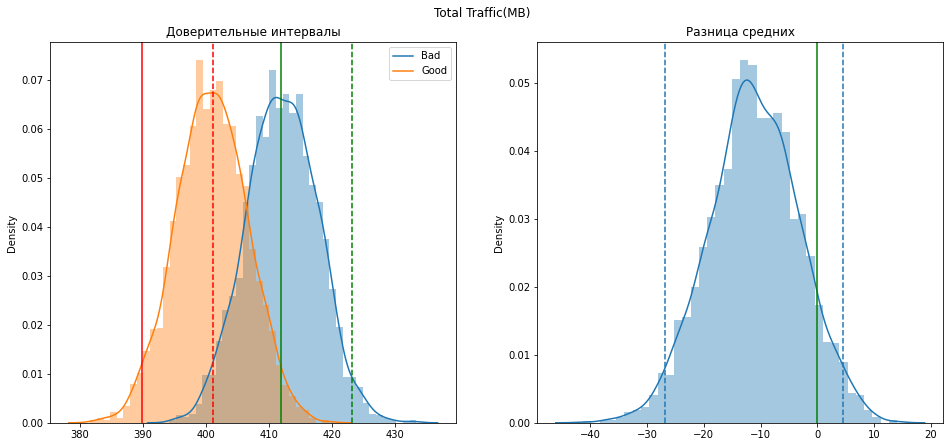

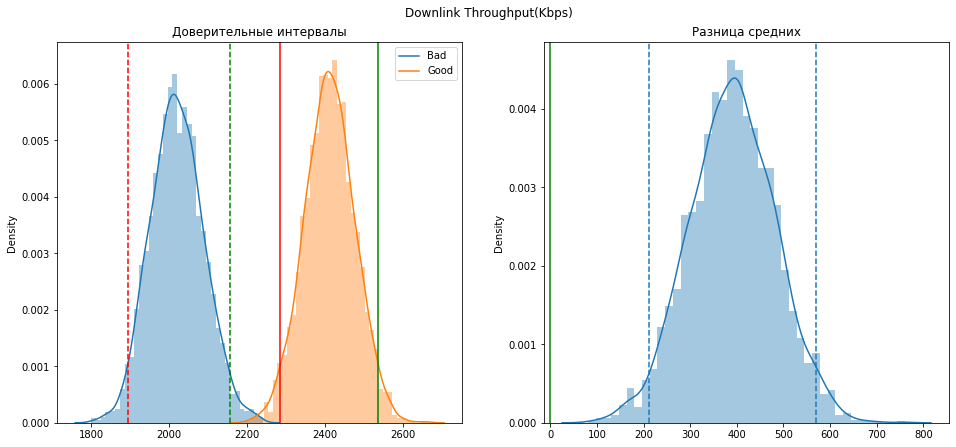

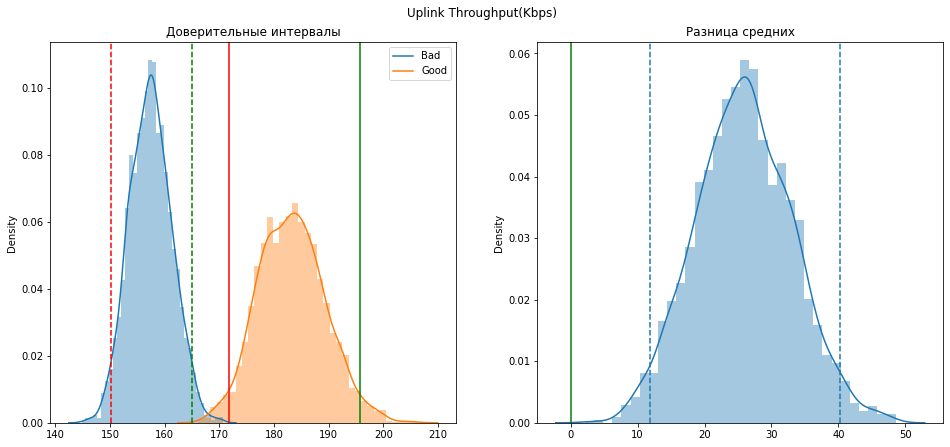

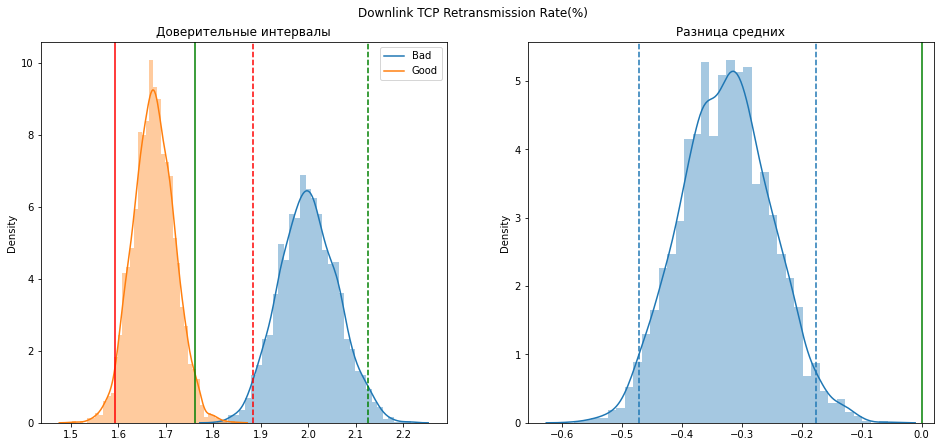

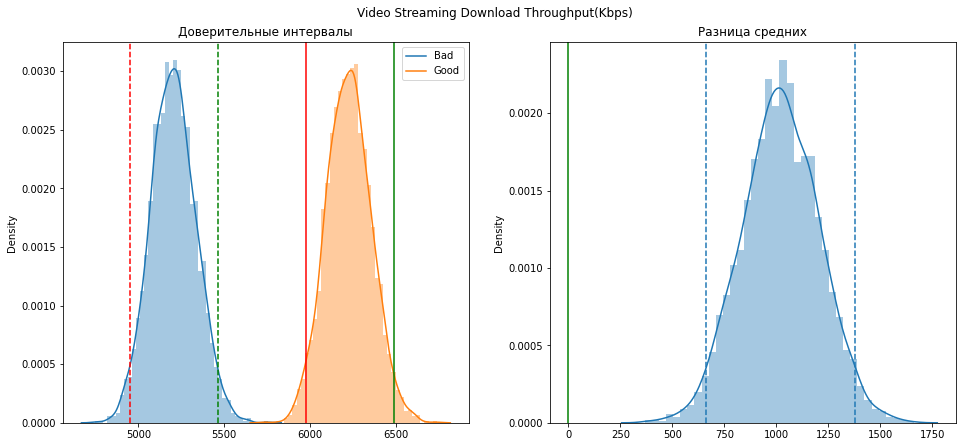

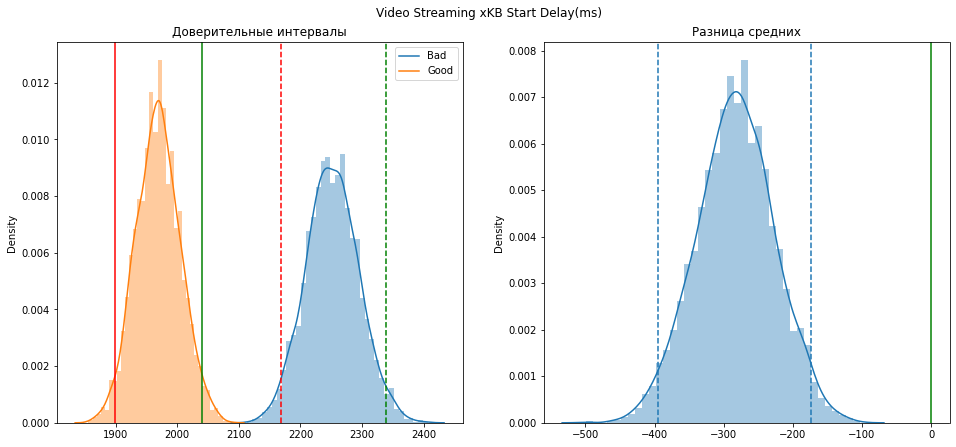

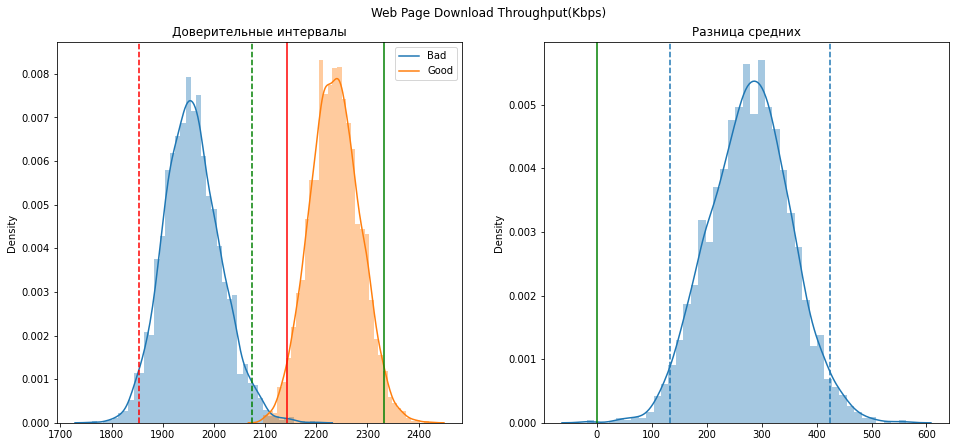

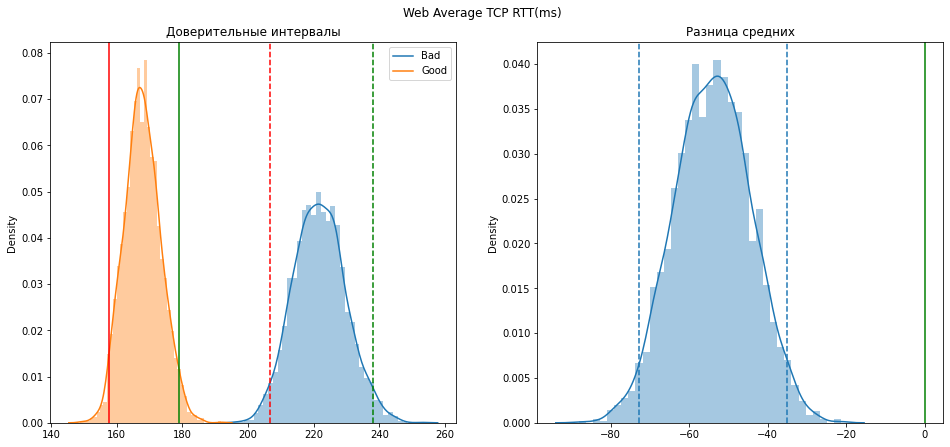

In [ ]:
for i in range(len(columns_list)):
  bootstrap(df_bad[columns_list[i]], df_good[columns_list[i]], 3000, inter=95)

Только в одном показателе при разнице средних ноль входит в 95% интервал. Во всех остальных случаях видна статистически значимая разница.

### 4.1.4 Выводы

В результате проведенного бутстрепа и визуализации разницы средних значений, только в одном из 8-ми технических показателях, ноль входил в 95% интервал. Это говорит о имеющейся статистически значимой разнице во всех остальных случаях.

Таким образом, мы можем сказать, что нулевая гипотеза №1 **неверна**.<br>
 Имеется зависимость от технических показателей качества связи абонентов и их оценкой. Качество связи у людей поставивших более низкую оценку действительно хуже. Соответственно проведение данного опроса (и подобных иму в дальнейшем) является целесообразным.


## 4.2 Гипотеза №2

### Подготовка данных

В данном датасете отсутствует вариант ответа "Very Good" (признак client_answer), так как при этом варианте нет ответа на Q2.

In [ ]:
df_main_total.head()

,user_id,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms),client_answer,A1,A2,A3,A4,A5,A6,A7
1,2,861.96324,3023.54,411.18,1.27,667.47,2080,255.36,425,Bad,0,0,0,1,0,0,0
2,3,261.11860,790.96,34.20,1.79,1079.60,6367,535.85,485,Very Bad,0,0,0,1,0,0,0
3,4,179.18564,2590.97,325.88,0.80,7053.81,3218,1221.02,51,Good,0,0,1,0,0,0,0
4,5,351.99208,731.61,223.54,1.15,4550.38,1767,2336.56,68,Very Bad,0,1,1,1,0,0,0
6,7,448.88413,438.27,81.32,1.98,1699.64,4223,856.05,220,Very Bad,0,0,0,1,1,0,0


Посмотрим какой вариант ответа на Q2 является самым популярным.

In [ ]:
df_answer = pd.DataFrame({'A1 — Недозвоны, обрывы при звонках' : [df_main_total.A1.sum()], 
                          'A2 — Время ожидания гудков при звонке' : [df_main_total.A2.sum()], 
                          'A3 — Плохое качество связи в зданиях, торговых центрах и т.п.' : [df_main_total.A3.sum()], 
                          'A4 — Медленный мобильный Интернет' : [df_main_total.A4.sum()], 
                          'A5 — Медленная загрузка видео' : [df_main_total.A5.sum()], 
                          'A6 — Затрудняюсь ответить' : [df_main_total.A6.sum()],
                          'A7 — Свой вариант' : [df_main_total.A7.sum()]
                          })

df_answer.T.sort_values(0, ascending=False)

,0
"A3 — Плохое качество связи в зданиях, торговых центрах и т.п.",705
"A1 — Недозвоны, обрывы при звонках",647
A4 — Медленный мобильный Интернет,625
A5 — Медленная загрузка видео,222
A2 — Время ожидания гудков при звонке,184
A7 — Свой вариант,86
A6 — Затрудняюсь ответить,50


Сгруппируем ответы на вопрос Q2.<br>
Выделим основные группы:<br>
1) internet and mobile (А3)<br>
2) internet (A4, A5)<br>
3) mobile (A1, A2)<br>
4) other (A6, A7)<br>


In [ ]:
#Признак с описанием проблемы
df_main_total['problem'] = None

In [ ]:
#Пометим тип проблемы (internet and mobile, internet, mobile, other)

for i in range(df_main_total.shape[0]):

  #Если в столбце А3 есть единица, то это проблема 'internet and mobile' 
  if df_main_total.iloc[i, 12] == 1:
    df_main_total.iloc[i, 17] = 'internet and mobile'

  #Если в столбцах А1 или А2 и, одновременно, в А4 или А5 есть единица, то это проблема 'internet and mobile'
  elif ((df_main_total.iloc[i, 10] == 1) | (df_main_total.iloc[i, 11] == 1)) & ((df_main_total.iloc[i, 13] == 1) | (df_main_total.iloc[i, 14] == 1)):
    df_main_total.iloc[i, 17] = 'internet and mobile'

  #Если в столбце А1 или/и А2 есть единица, то это проблема 'mobile'
  elif ((df_main_total.iloc[i, 10] == 1) | (df_main_total.iloc[i, 11] == 1)) & ((df_main_total.iloc[i, 13] != 1) & (df_main_total.iloc[i, 14] != 1)):
    df_main_total.iloc[i, 17] = 'mobile'

  #Если в столбце А4 или/и А5 есть единица, то это проблема 'internet'
  elif ((df_main_total.iloc[i, 13] == 1) | (df_main_total.iloc[i, 14] == 1)) & ((df_main_total.iloc[i, 10] != 1) & (df_main_total.iloc[i, 11] != 1)):
    df_main_total.iloc[i, 17] = 'internet'
  
  #В остальных 'other'
  else:
    df_main_total.iloc[i, 17] = 'other'

In [ ]:
df_main_total.groupby('problem').count()['user_id']

problem
internet               211
internet and mobile    824
mobile                 204
other                  111
Name: user_id, dtype: int64

### 4.2.1 Формулировка гипотезы

В первую очередь, я выделю группу метрик, которые буду использовать для формулировки и проверки гипотезы.

Я выбрал следующие метрики:<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Video Streaming Download Throughput(Kbps)` — скорость загрузки потокового видео;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Video Streaming xKB Start Delay(ms)` — задержка старта воспроизведения видео;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Web Page Download Throughput(Kbps)` — скорость загрузки web-страниц через браузер;<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Web Average TCP RTT(ms)` — пинг при просмотре web-страниц.<br>

Я считаю, что выбранные метрики отражают качество связи при использовании интернета. Назовём их - "метрики для характеристики качества интернет соединения".

Предположим, что "метрики для характеристики качества интернет соединения"
группы абонентов с проблемой internet хуже, чем те же показатели группы с проблемой mobile<br>


---


**Нулевая гипотеза:**<br>
Метрики для характеристики качества интернет-соединения для абонентов с оценкой по Q2 обозначающие проблему Internet не отличаются по качеству от показателей с оценкой по Q2 обозначающие проблему Mobile.

**Альтернативная гипотеза:**<br>
Существует связь между  "метриками для характеристики качества интернет-соединения" и признаком problem (составленым на основе ответов по Q2).<br>



---



В случае, подтверждения нулевой гипотезы следует обратить внимание на абонентов, которые при идентичных технических показателях, оставляют низкие оценки связаные с вопросом качества интернета. Им необходимо предложить индивидуальные тарифные планы.


### 4.2.2 Разведочный анализ


Сформируем необходимый датасет для дальнейшего анализа.

In [ ]:
df_inter_mobile = df_main_total[(df_main_total.problem == 'internet') | (df_main_total.problem == 'mobile')]

In [ ]:
#Выберем метрики для характеристики качества интернет соединения 
df_inter_mobile = df_inter_mobile.loc[:, ['Video Streaming Download Throughput(Kbps)', 
                                          'Video Streaming xKB Start Delay(ms)', 
                                          'Web Page Download Throughput(Kbps)', 
                                          'Web Average TCP RTT(ms)',
                                          'problem']]

In [ ]:
df_inter_mobile.head()

,Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms),problem
1,667.47,2080,255.36,425,internet
2,1079.60,6367,535.85,485,internet
6,1699.64,4223,856.05,220,internet
19,8878.63,1678,2358.38,94,mobile
24,23392.06,757,2109.31,60,mobile


In [ ]:
df_internet_problem = df_inter_mobile[df_inter_mobile.problem == 'internet']
df_mobile_problem = df_inter_mobile[df_inter_mobile.problem == 'mobile']

In [ ]:
df_mobile_problem.shape[0], df_internet_problem.shape[0]

(204, 211)

Посмотрим на частотное распределение признаков.

In [ ]:
columns_inter_conn = df_inter_mobile.columns

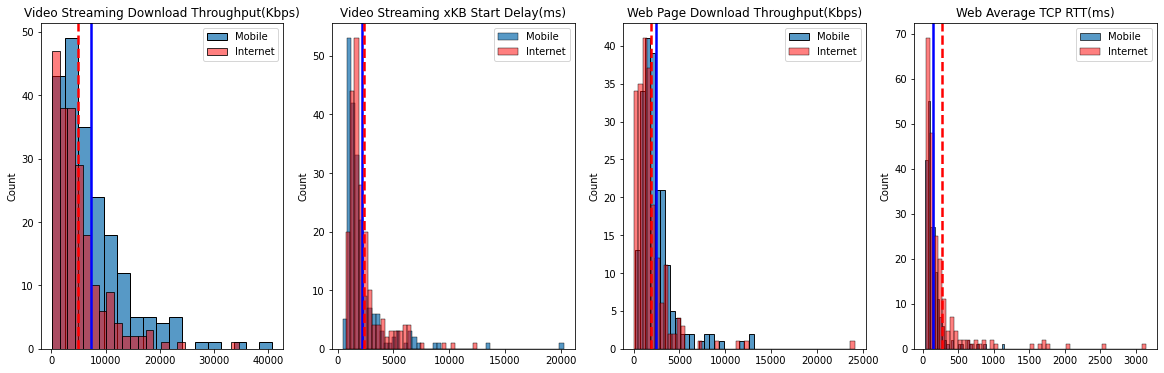

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(20, 6))

for i in range(4):
  sns.histplot(df_mobile_problem[columns_inter_conn[i]], ax=axes[i])
  sns.histplot(df_internet_problem[columns_inter_conn[i]], ax=axes[i], color='red', alpha=0.5)
  axes[i].legend(['Mobile', 'Internet'])

  axes[i].axvline(np.mean(df_mobile_problem[columns_inter_conn[i]]), c='blue', lw=2.5)
  axes[i].axvline(np.mean(df_internet_problem[columns_inter_conn[i]]), c='red', ls='--', lw=2.5)

  axes[i].set_title(columns_inter_conn[i])
  axes[i].set_xlabel(None)

В данных отсутствуют отрицательные значения.

По каждому техническому показателю наблюдается скошенность влево и длинный хвост вправо (выбросы).

Наблюдается разница между средними значениями, необходим более подробный анализ.

### 4.2.3 Проверка статистической гипотезы

Согласно теории, если данные распределены ненормально и/или неизвестна дисперсия в популяции, выборочное  среднее подчиняется t-распределению Стьюдента.<br>

Таким образом, было принято решение для построения 95% доверительный интервал для генерального среднего в популяции по следующей формуле:<br>
x̅ ± Za/2 * σ/√(n)

In [ ]:
#Создадим функцию для расчёта доверительных интервалов для среднего
def confidence_interval (df_A, df_B, alpha=0.05):
  norm_rv = stats.norm()
  t_st = norm_rv.ppf(1-alpha/2) #Уровень доверия 0.05

  #A
  x_hat = np.mean(df_A)
  var = np.std(df_A)
  n = df_A.shape[0]
  #A confidence interval
  left_A = x_hat - t_st * (var/np.sqrt(n))
  right_A = x_hat + t_st * (var/np.sqrt(n))

  #B
  x_hat = np.mean(df_B)
  var = np.std(df_B)
  n = df_B.shape[0]
  #B confidence interval
  left_B = x_hat - t_st * (var/np.sqrt(n))
  right_B = x_hat + t_st * (var/np.sqrt(n))

  #Построим графики
  fig, ax = plt.subplots(figsize=(18, 8))
  #Воспроизводим на графике
  sns.distplot(df_A, label = 'Mobile', kde = False)
  sns.distplot(df_B, label = 'Internet', kde = False)
  ax.set_title('Доверительные интервалы')
  
  #Добавим легенду
  ax.legend(['Mobile', 'Internet'])

  #Покажем доверительный интервал
  ax.axvline(left_A, linestyle = '--',color='r')
  ax.axvline(right_A, linestyle = '--',color='g')
  ax.axvline(np.mean(df_A), linestyle = '--',color='b')


  ax.axvline(left_B, linestyle = '-', color='r')
  ax.axvline(right_B, linestyle = '-',color='g')
  ax.axvline(np.mean(df_B), linestyle = '-',color='b')


  plt.xlim([np.mean(df_A)-(np.mean(df_A)/2), np.mean(df_B)+np.mean(df_B)])

In [ ]:
#Список технических параметров характерезующих интернет соединение

columns_inter_conn = columns_inter_conn[0:4]

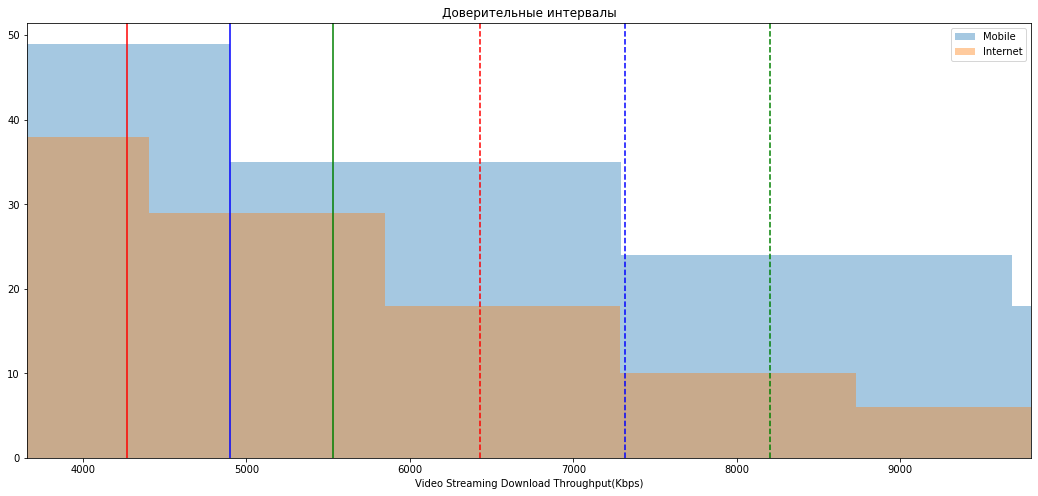

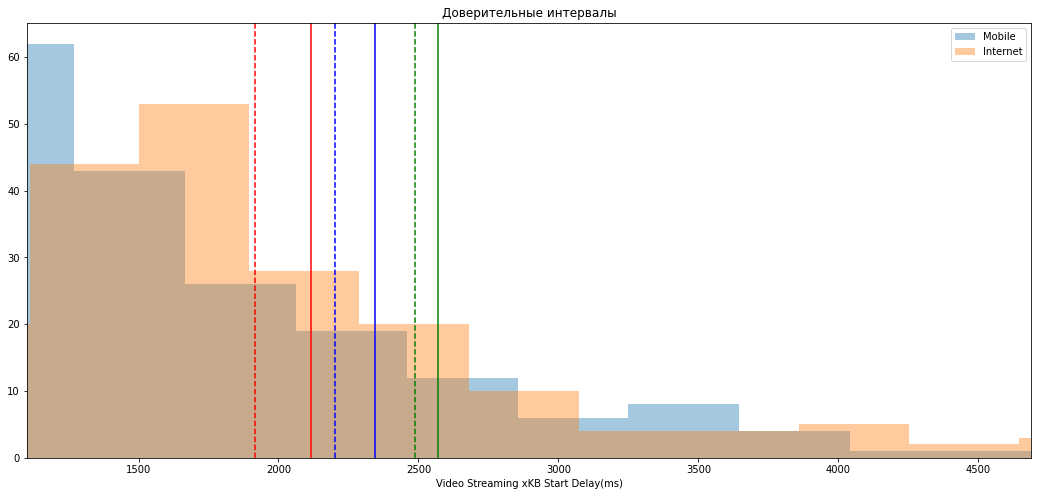

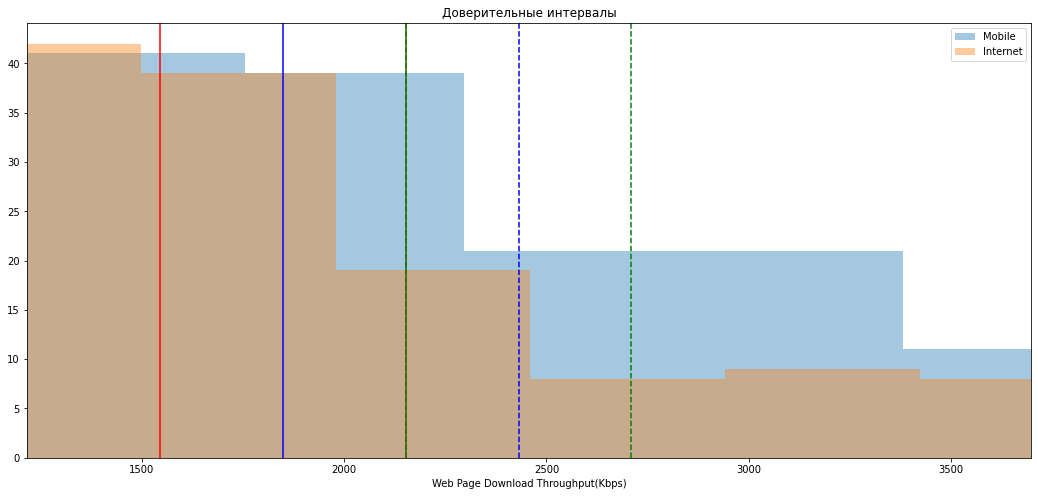

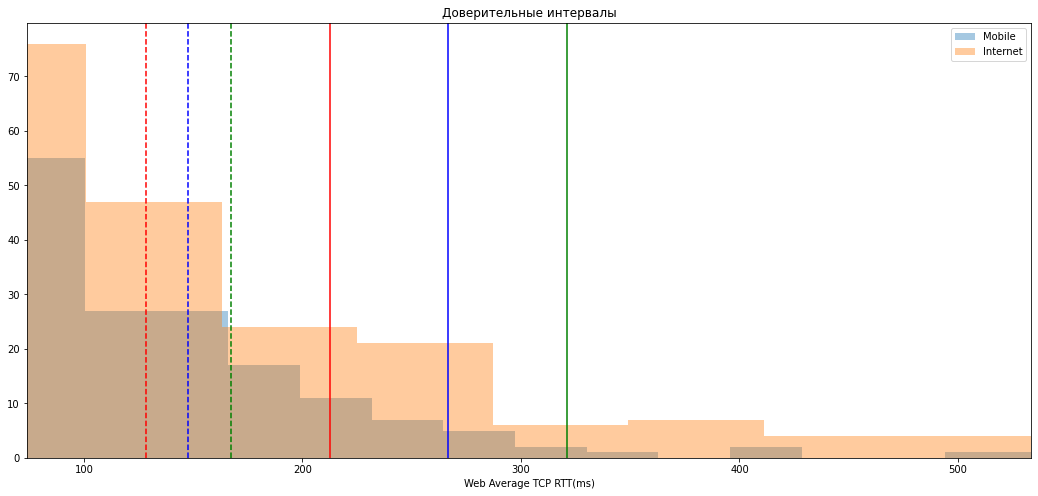

In [ ]:
#Расчитаем доверительные интервалы для среднего

for i in range(len(columns_inter_conn)):
  confidence_interval(df_mobile_problem[columns_inter_conn[i]], df_internet_problem[columns_inter_conn[i]])

Из проведенного анализа видно, что доверительные интервалы пересекаются только в одном случае (Video Streaming xKB Start Delay(ms)). В остальных случаях доверительные интервалы не пересекаются.

Для подтверждения полученных ранее результатов дополнительно проведем bootstrap.

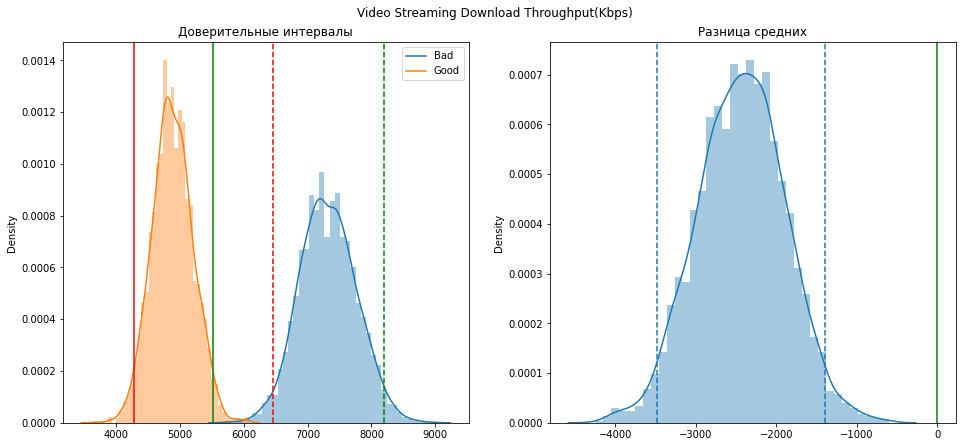

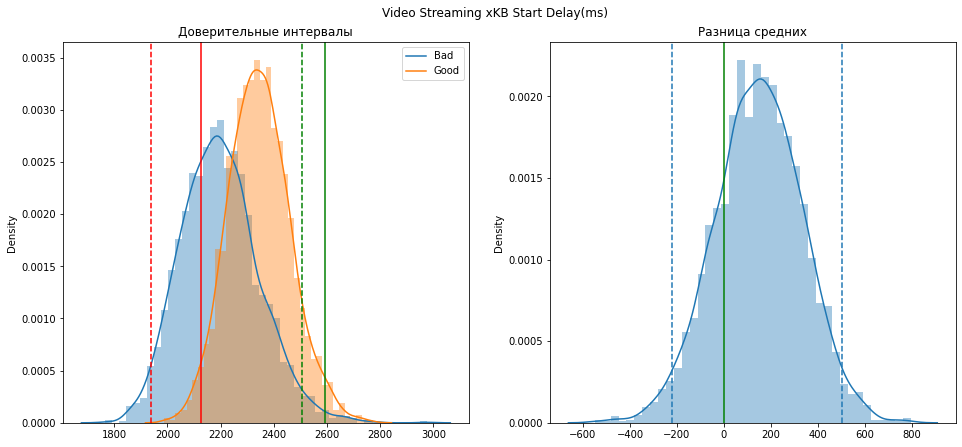

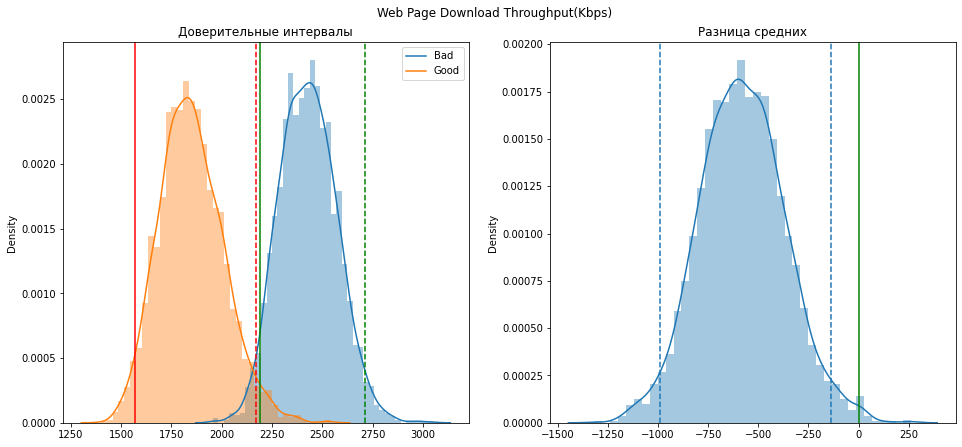

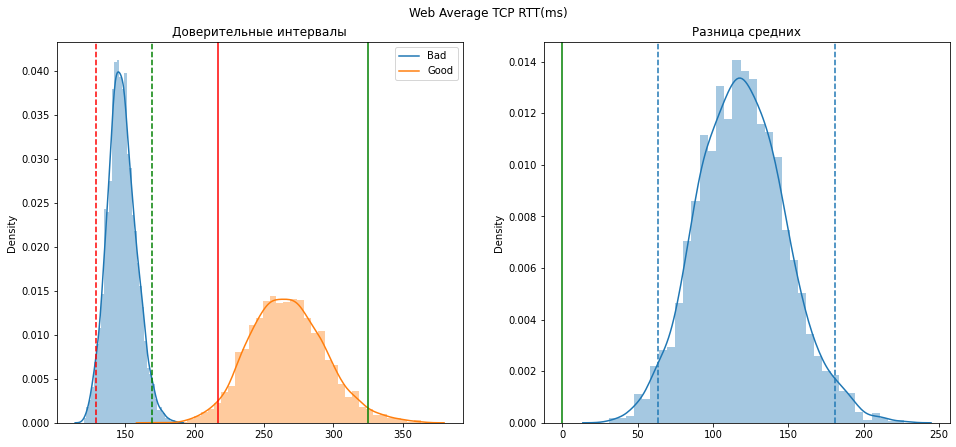

In [ ]:
#Воспользуемся написанной ранее функцией для bootstrap

for i in range(len(columns_inter_conn)):
  bootstrap(df_mobile_problem[columns_inter_conn[i]], df_internet_problem[columns_inter_conn[i]], 3000, inter=95)

В результате видно, что только в одном случае доверительные интервалы пересекаются, и ноль входит в диапозон 95% при разнице средних (Video Streaming xKB Start Delay(ms)).

### 4.2.4 Выводы

В результате проведенного анализа с построением доверительных интервалов для среднего значения, а так же бутстрепа и визуализации разницы средних, только в одном из 4-ми технических показателях, доверительные интервалы пересекались и ноль входил в 95% интервал при разнице средних. Это говорит о имеющейся статистически значимой разнице во всех остальных случаях.

Таким образом, мы можем сказать, что нулевая гипотеза №2 **неверна**.

Качество интернет-соединения у людей указавших на проблемы "Internet" действительно хуже чем у людей с проблемами "Mobile". То есть имеется зависимость технических показателей интернет соединения абонентов и их оценкой. Таким образом следует обратить внимание на людей поставивших низкую оценку по причине плохого интернета, возможно стоит улучшить связь конкретных абонентов по соответствующим техническим показателям интернет соединения.

Что касается технического показателя Video Streaming xKB Start Delay(ms), то его значения не различаются в зависимости от оценки. Скорее всего данный показатель не является информативным и сколько-нибудь влияющим на оценки пользователей (милисекундные задержки при воспроизведении фидео не так критично воспринимаются абонентами). Соответственно, можно убрать этот технический показатель из общего датасета.

## 4.3 Гипотеза №3

### Подготовка данных

Сформируем два датасета для анализа

In [ ]:
df_worst_connect = df_main_total[df_main_total.problem == 'internet and mobile']
df_acc_connect = df_main_total[df_main_total.problem != 'internet and mobile']

In [ ]:
df_worst_connect.head()

,user_id,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms),client_answer,A1,A2,A3,A4,A5,A6,A7,problem
3,4,179.18564,2590.97,325.88,0.80,7053.81,3218,1221.02,51,Good,0,0,1,0,0,0,0,internet and mobile
4,5,351.99208,731.61,223.54,1.15,4550.38,1767,2336.56,68,Very Bad,0,1,1,1,0,0,0,internet and mobile
8,9,783.64464,1786.99,271.77,0.84,6802.42,1200,1837.02,132,Very Bad,1,0,1,1,0,0,0,internet and mobile
9,10,455.97369,610.43,81.86,4.10,1317.76,3350,1054.15,165,Bad,1,0,1,1,1,0,0,internet and mobile
10,11,526.08652,535.54,208.67,1.46,2621.14,1479,2376.50,88,Bad,1,0,1,0,0,0,0,internet and mobile


In [ ]:
df_acc_connect.head()

,user_id,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms),client_answer,A1,A2,A3,A4,A5,A6,A7,problem
1,2,861.96324,3023.54,411.18,1.27,667.47,2080,255.36,425,Bad,0,0,0,1,0,0,0,internet
2,3,261.11860,790.96,34.20,1.79,1079.60,6367,535.85,485,Very Bad,0,0,0,1,0,0,0,internet
6,7,448.88413,438.27,81.32,1.98,1699.64,4223,856.05,220,Very Bad,0,0,0,1,1,0,0,internet
19,20,256.01052,2195.75,66.85,1.27,8878.63,1678,2358.38,94,Bad,1,1,0,0,0,0,0,mobile
24,25,172.40100,5474.84,272.10,0.36,23392.06,757,2109.31,60,Bad,1,0,0,0,0,0,0,mobile


В дальнейшем будем анализировать все технические показатели, так как они целиком отражают и мобильное и интернет соединение.

### 4.3.1 Формулировка гипотезы

Предположим, что у группы абонентов с проблемами "internet and mobile" действительно самые низкие показатели по всем метрикам (связанных как с интернетом, так и с мобильной связью). То есть наихудшее качество связи и наихудшие технические показатели.


---


**Нулевая гипотеза:**<br>
Технические показатели для абонентов с оценкой по Q2 обозначающие проблему "Internet and Mobile" не отличаются по качеству от показателей абонентов с другими проблемами (internet, mobile, other).

**Альтернативная гипотеза:**<br>
Существует связь между  техническими показателями качеста и проблемой указанной аббонентами как "Internet and Mobile".<br>



---



В случае, подтверждения альтернативной гипотезы, следует расширить доступный перечень технических показателей, для проведения более глубокого анализа, и получения данных о точной причине низкого качества связи данных абонентов.

### 4.3.2 Разведочный анализ

Проведем разведочный анализ

In [ ]:
df_worst_connect.shape[0], df_acc_connect.shape[0]

(824, 526)

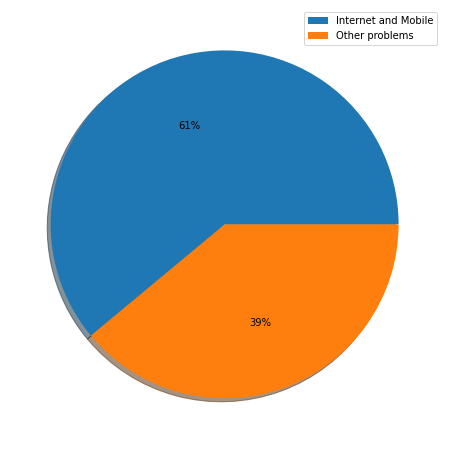

In [ ]:
fig = plt.subplots(figsize=(8, 8))

labels=['Internet and Mobile', 'Other problems']

plt.pie([df_worst_connect.shape[0], df_acc_connect.shape[0]], 
        shadow=True, autopct='%.0f%%')

plt.legend(labels, loc="best")

plt.show()

Анализируемые выборки не сбалансированы, это видно на графиках ниже. Однако, при проведении bootstrap этим фактом можно пренебречь.

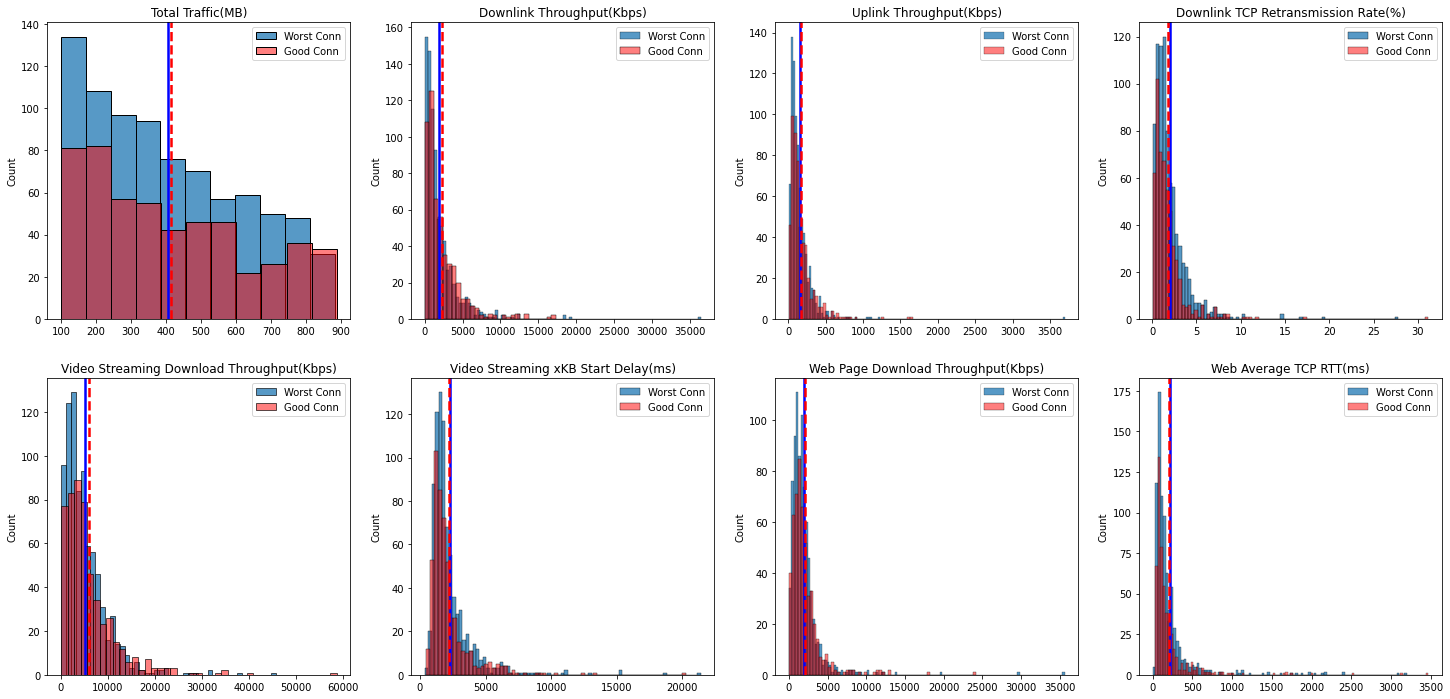

In [ ]:
# Посмотрим на распределение значений по всем техническим показателям
fig, axes = plt.subplots(2, 4, figsize=(25, 12))

for i in range(4):
  for j in range(2):
    sns.histplot(df_worst_connect[columns_list[i+4*j]], ax=axes[j][i])
    sns.histplot(df_acc_connect[columns_list[i+4*j]], ax=axes[j][i], color='red', alpha=0.5)
    axes[j][i].legend(['Worst Conn', 'Good Conn'])

    axes[j][i].axvline(np.mean(df_worst_connect[columns_list[i+4*j]]), c='blue', lw=2.5)
    axes[j][i].axvline(np.mean(df_acc_connect[columns_list[i+4*j]]), c='red', ls='--', lw=2.5)


    axes[j][i].set_title(columns_list[i+4*j])
    axes[j][i].set_xlabel(None)

В данных отсутствуют отрицательные значения.

По каждому техническому показателю наблюдается скошенность влево и длинный хвост вправо (выбросы), за исключение технического показателя Total Traffic (MB). 

### 4.3.3 Проверка статистической гипотезы

В данном случае самым оптимальным методом проверки статистической гипотезы является bootstrap.

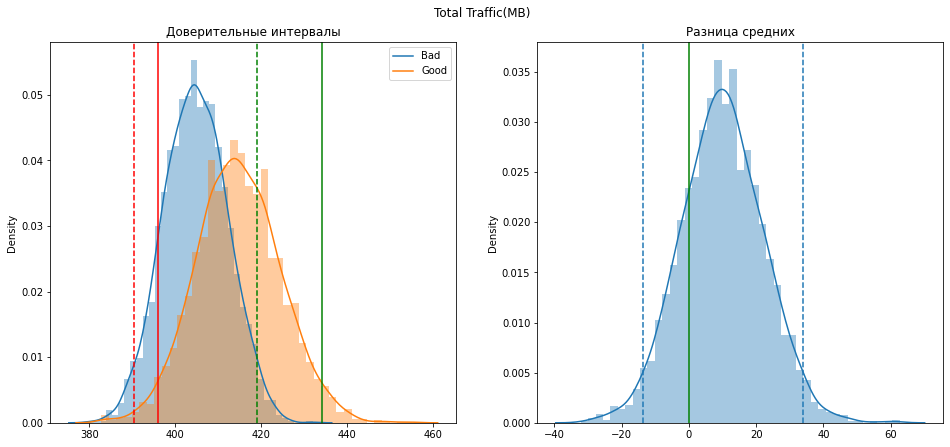

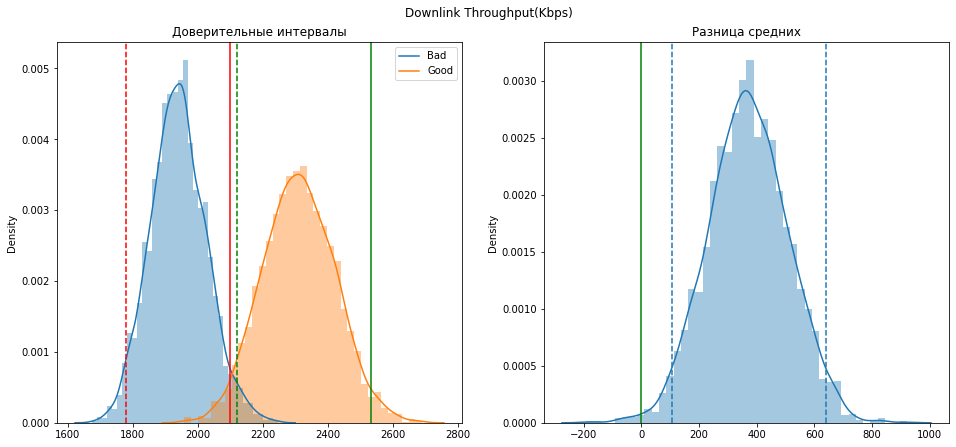

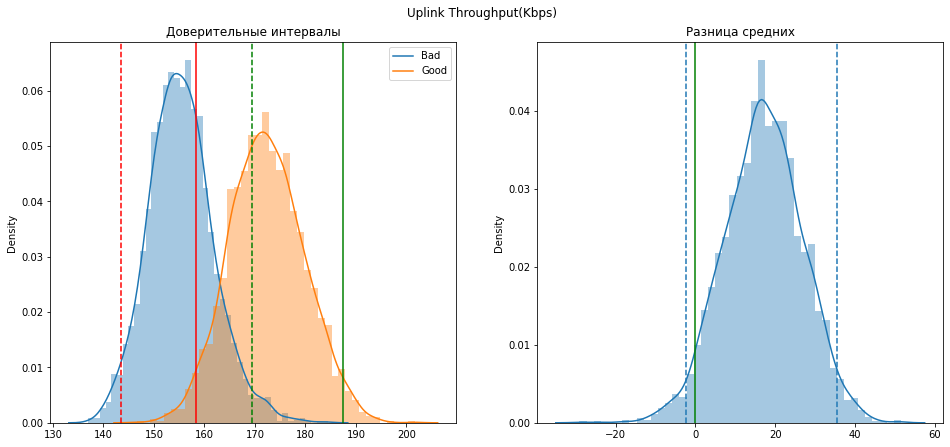

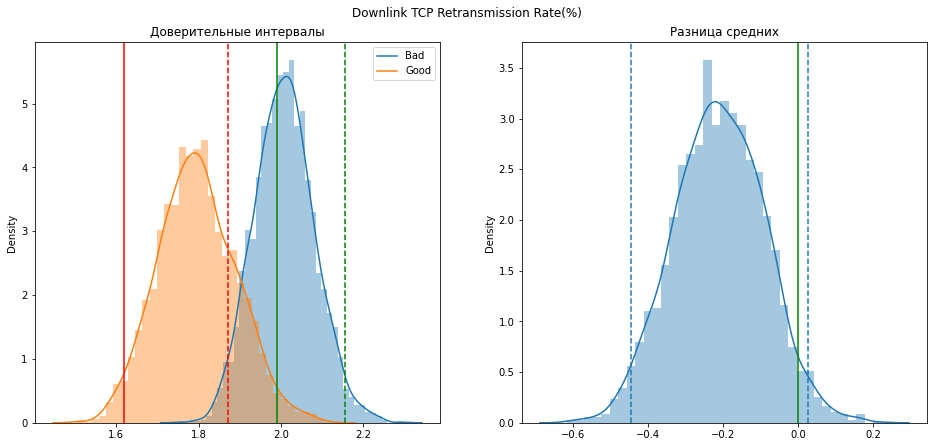

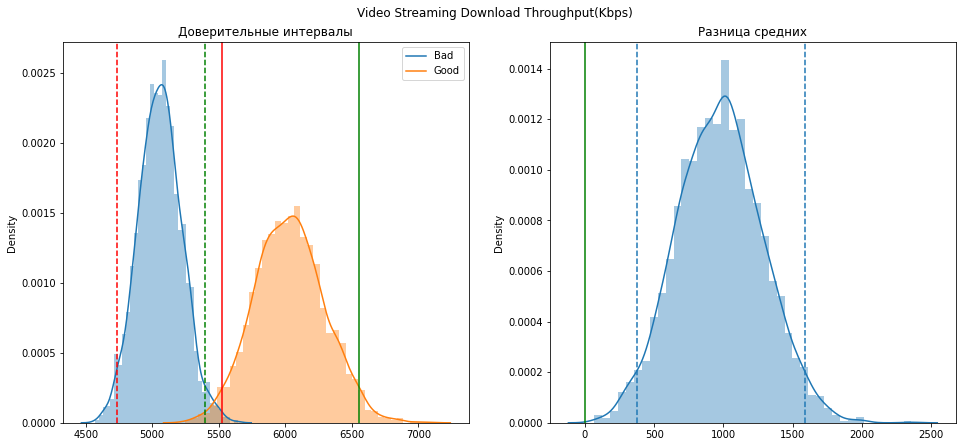

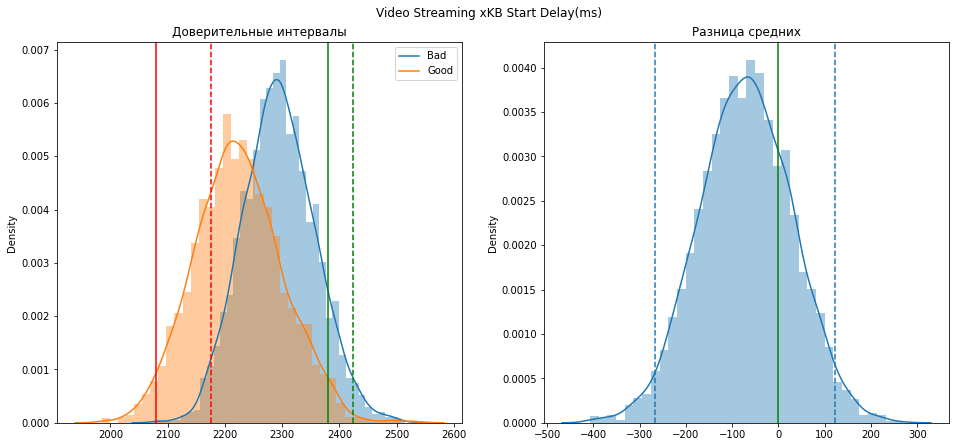

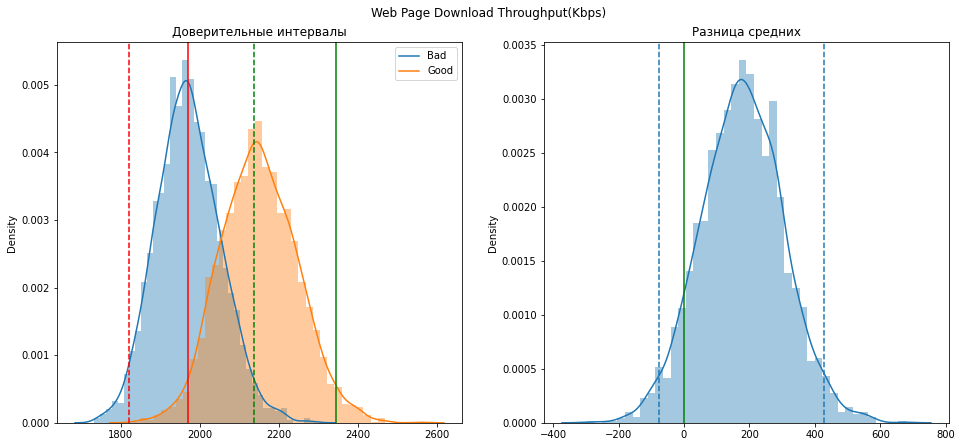

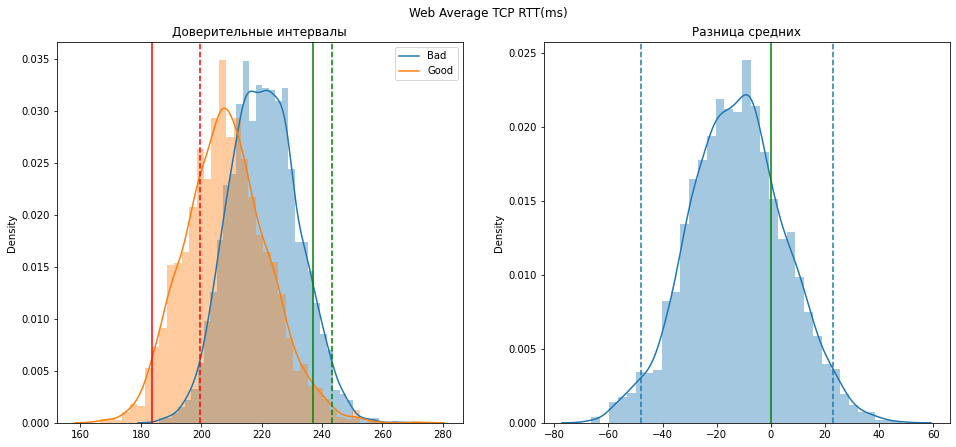

In [ ]:
for i in range(len(columns_list)):
  bootstrap(df_worst_connect[columns_list[i]], df_acc_connect[columns_list[i]], 3000, inter=95)

По результатам проведенного bootstrap видно, что в 6-ти случаях из 8-ми доверительные интервалы пересекались и ноль входил в разницу средних.

### 4.3.4 Выводы

В результате проведенного анализа с построением доверительных интервалов с помощью метода бутстрепа и визуализации разницы средних,  в 6-ти из 8-ми технических показателях, доверительные интервалы пересекались и ноль входил в 95% интервал при разнице средних. Это говорит об отсутствии  статистически значимой разнице в большинстве технических показателях.

Таким образом, мы можем сказать, что нулевая гипотеза №3 **верна**.

Технические показатели у людей указавших на проблемы "Internet and Mobile" в большей части не отличаются от технических показателей остальных абонентов, указавших более конкретную проблему. Нет оснований полагать, что абоненты с проблемой "Internet and Mobile" имеют более низкие технические показатели, скорее всего данные абоненты более активно используют как мобильные, так и интернет функции оператора. Таким образом можно предложить данным абонентам более индивидуальные тарифные планы, основанные на большем времени использования всех функций сети.


# 5 Выводы по всей работе

В результате проделанной работы можно сделать следующие выводы:<br>

1) В результате анализа были выявлены зависимости технических показателей от оценок поставленных в вопросе Q1 **(Гипотеза №1)**. Чем хуже технический показатель, тем ниже оценка у абонента. Соответственно, опросы такого рода помогу находить проблемные места в технических характеристиках связи и улучшать их в дальнейшем.<br>

2) При анализе ответов абонентов по вопросу Q2 **(Гипотеза №2)** были выявленны зависимости среди абонентов указавших проблемы "Internet" и техническими характеристиками интернет соединения. Необходимо провести диагностику интернет соединения у указанных абонентов, так как их качество интернет соединения действительно хуже остальных.<br>
Технический параметр  Video Streaming xKB Start Delay(ms) следует исключить из анализа, так как его показания являются не информативными.<br>

3) Анализ **гипотезы №3** показал, что технические показатели абонентов с проблемой "Internet and Mobile" не отличаются от технических показателей остальных абонентов, укзавших более конкретную проблему. Данные абонеты активно используют как мобильные, так и интернет функции оператора. Соответствено, этим абонентом необходимо предложить более индивидуальные тарифные планы, которые основаны на большем времени использования всех функций сети.